In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

Path = '/home/mgander/Atlantic/data/kinobeads'

In [2]:
plt.rcParams['figure.dpi'] = 200

In [3]:
frames=[]
for i in range(5):
    frames.append(pd.read_csv(f'{Path}/Cc/tomls/{i}/curves.txt', sep='\t'))

In [4]:
# Remove all the curves with sub nano molar potency, these are typically curves where the TMT0 is randomly high or the only one observed
Df=pd.concat(frames, ignore_index=True)
Df=Df[Df['pEC50']<9].copy()
Df

,Name,N duplicates,Raw 0,Raw 1,Raw 2,Raw 3,Raw 4,Raw 5,Raw 6,Raw 7,...,Curve Front Error,Curve Back Error,Null Model,Null RMSE,Curve F_Value,Curve P_Value,Curve Log P_Value,Curve F_Value SAM Corrected,Curve Relevance Score,Curve Regulation
0,Alflutinib_A0FGR8_ESYT2,1,1.0,0.354174,0.000000,0.518452,0.486142,0.000000,0.583420,0.881749,...,NaN,NaN,0.493838,0.322954,0.996983,0.554513,0.256088,0.000000,-0.000000,NaN
1,Alflutinib_A0PJE2_DHRS12,1,1.0,0.787928,0.647647,0.878969,1.166131,1.088750,1.267217,1.054809,...,NaN,NaN,1.032582,0.222495,0.000000,1.000000,-0.000000,0.000000,-0.000000,NaN
2,Alflutinib_A1L0T0_ILVBL,1,1.0,0.289471,1.043326,1.329083,0.456853,0.725742,0.988069,1.016331,...,NaN,NaN,0.895604,0.321857,0.029984,1.000000,-0.000000,0.000000,-0.000000,NaN
3,Alflutinib_A7MCY6_TBKBP1,1,1.0,0.949664,0.933792,1.042098,1.110649,1.014436,1.095533,0.960547,...,0.039191,8.701931e+01,0.998623,0.071488,1.172780,0.476718,0.321738,0.269556,0.012552,not
4,Alflutinib_A8CG34;Q96HA1_POM121C;POM121,1,1.0,1.475922,1.021377,1.537523,1.357027,1.219474,1.421838,2.218643,...,0.204794,2.058238e+08,1.392168,0.341162,0.000000,1.000000,-0.000000,0.000000,-0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322755,CC-223_Q9Y6M4_CSNK1G3,1,1.0,0.934967,1.053193,1.015841,1.064115,1.007754,1.124396,1.028931,...,NaN,NaN,1.028650,0.051509,0.000000,1.000000,-0.000000,0.000000,-0.000000,not
322756,CC-223_Q9Y6M9_NDUFB9,1,1.0,0.347626,0.336156,0.458306,1.143362,0.989804,0.410244,0.811356,...,NaN,NaN,0.687107,0.312360,0.334662,0.939642,0.027038,0.000000,-0.000000,NaN
322757,CC-223_Q9Y6N5_SQRDL,1,1.0,1.157177,1.137912,1.155893,1.184576,0.972968,0.882759,1.040303,...,0.128155,9.817642e+01,1.066449,0.101779,0.379530,0.915146,0.038510,0.137970,0.000104,NaN
322758,CC-223_Q9Y6R4_MAP3K4,1,1.0,0.931932,1.114696,0.940902,1.001109,1.067131,1.001779,0.976303,...,NaN,NaN,1.004232,0.057239,0.001548,1.000000,-0.000000,0.000000,-0.000000,not


<Axes: xlabel='Curve Front', ylabel='Count'>

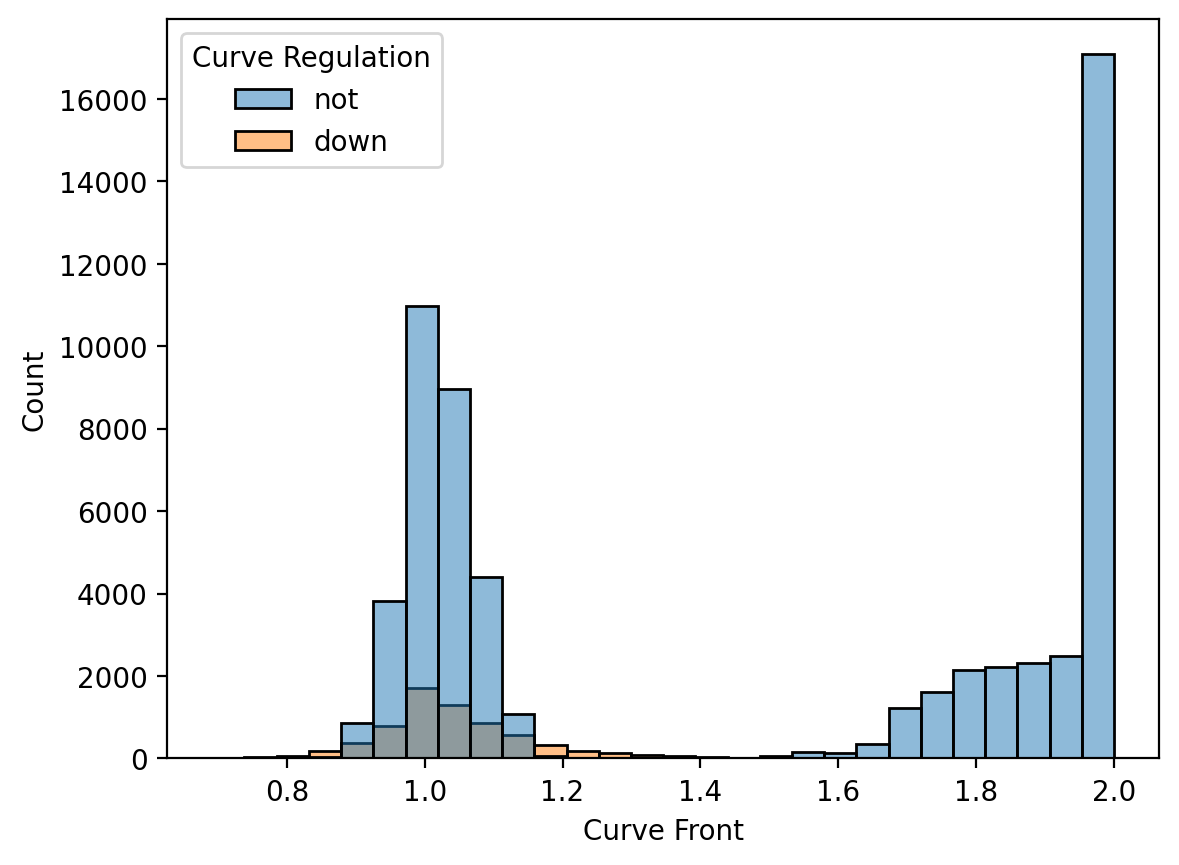

In [5]:
sns.histplot(data=Df, x='Curve Front', hue='Curve Regulation')

<Axes: xlabel='Curve Slope', ylabel='Count'>

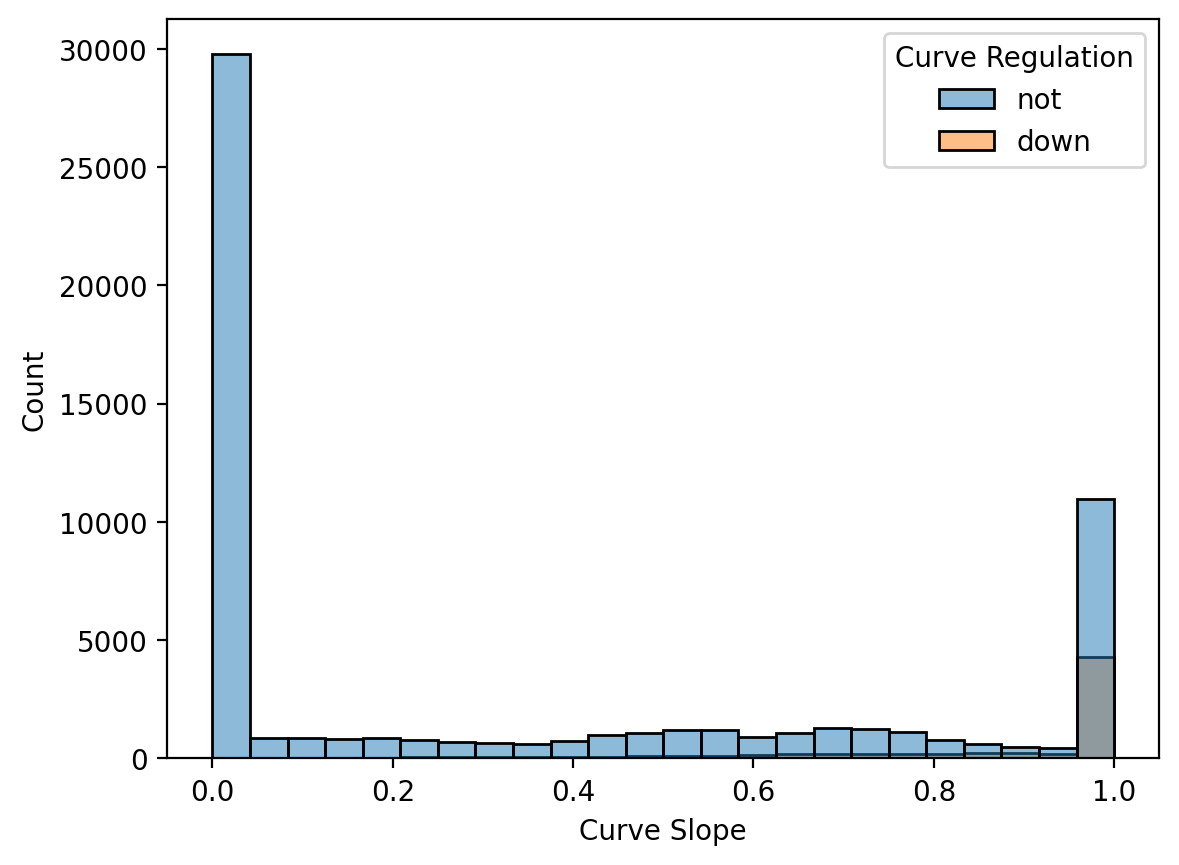

In [6]:
sns.histplot(data=Df, x='Curve Slope', hue='Curve Regulation')

<Axes: xlabel='pEC50', ylabel='Count'>

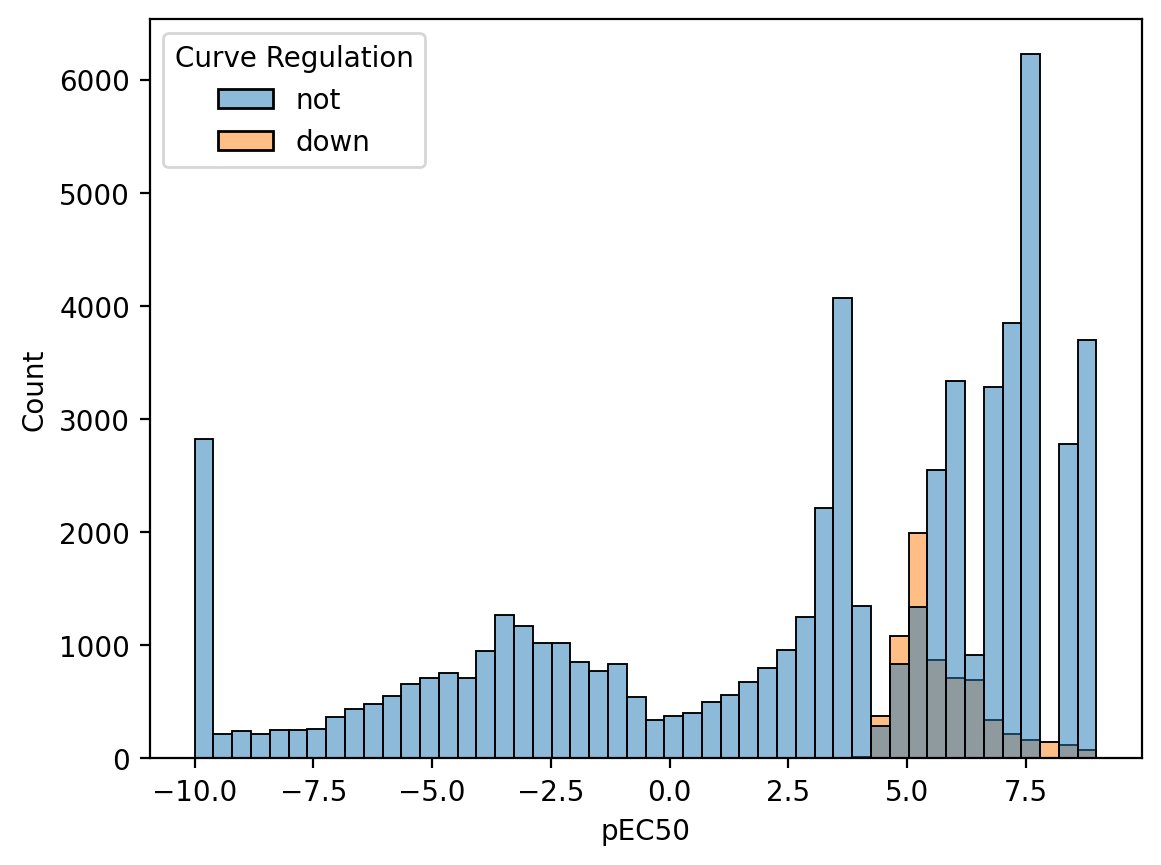

In [7]:
sns.histplot(data=Df, x='pEC50', hue='Curve Regulation')

<Axes: xlabel='Curve Back', ylabel='Count'>

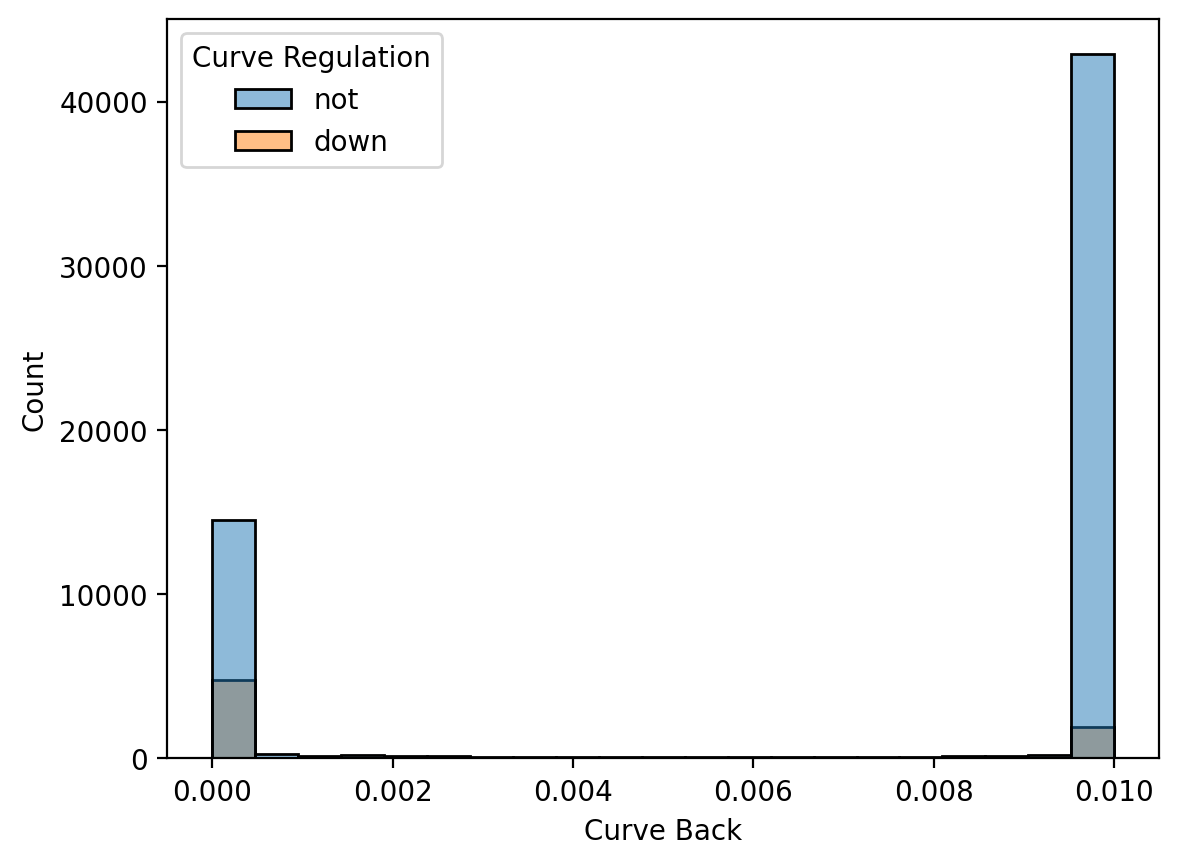

In [8]:
sns.histplot(data=Df, x='Curve Back', hue='Curve Regulation')

In [9]:
Df.value_counts('Curve Regulation')

Curve Regulation
not     59947
down     6808
Name: count, dtype: int64

In [10]:
# Remove noisy curves
#Dfs = Df.sort_values('Curve Relevance Score').iloc[-1000:].copy()
Dfs = Df[Df['Curve Relevance Score']>1].copy()
#Dfs = Df.copy()

In [11]:
Dfs = Df[Df['Curve P_Value']<0.05]

In [12]:
Dfs.columns

Index(['Name', 'N duplicates', 'Raw 0', 'Raw 1', 'Raw 2', 'Raw 3', 'Raw 4',
       'Raw 5', 'Raw 6', 'Raw 7', 'Raw 8', 'Ratio 0', 'Ratio 1', 'Ratio 2',
       'Ratio 3', 'Ratio 4', 'Ratio 5', 'Ratio 6', 'Ratio 7', 'Ratio 8',
       'Signal Quality', 'pEC50', 'Curve Slope', 'Curve Front', 'Curve Back',
       'Curve Fold Change', 'Curve AUC', 'Curve RMSE', 'Curve R2',
       'pEC50 Error', 'Curve Slope Error', 'Curve Front Error',
       'Curve Back Error', 'Null Model', 'Null RMSE', 'Curve F_Value',
       'Curve P_Value', 'Curve Log P_Value', 'Curve F_Value SAM Corrected',
       'Curve Relevance Score', 'Curve Regulation'],
      dtype='object')

<Axes: xlabel='Curve Fold Change', ylabel='Curve Log P_Value'>

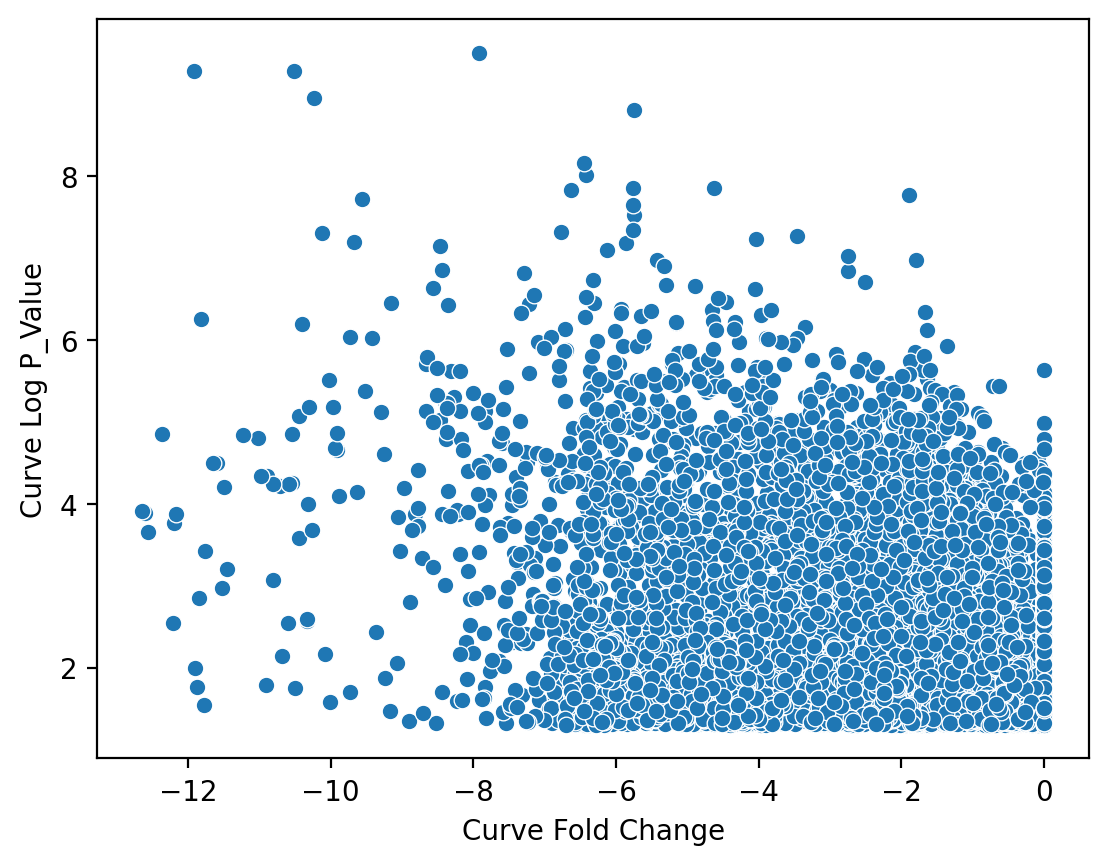

In [13]:
sns.scatterplot(data=Dfs, x='Curve Fold Change', y='Curve Log P_Value')

In [14]:
df = pd.read_pickle(f'{Path}/Uniprot_human_processed.pkl')

Dfs['Gene'] = [a.split('_')[-1] for a in Dfs['Name']]
genes = sorted(set(Dfs['Gene']))

D_gene_mapper={np.NaN:'nan', 'nan':'nan'}
for g in df['Gene Names']:
    if str(g)!='nan':
        spl = g.split(' ')
        D_gene_mapper[spl[0]] = spl[0]
        if len(spl)>1:
            for i in range(1,len(spl)):
                D_gene_mapper[spl[i]] = spl[0]

mappable_genes = list(D_gene_mapper.keys())

/tmp/ipykernel_6401/413559363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dfs['Gene'] = [a.split('_')[-1] for a in Dfs['Name']]


In [15]:
# Check which genes are missing

In [16]:
not_mappable_genes = [a for a in genes if not a in mappable_genes]

In [17]:
for g in not_mappable_genes:
    D_gene_mapper[g]=g.split(';')[0]
mappable_genes = list(D_gene_mapper.keys())

In [18]:
[a for a in genes if not a in mappable_genes]

[]

In [19]:
Dfs['Gene'] = Dfs['Gene'].map(D_gene_mapper)

/tmp/ipykernel_6401/1611407132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dfs['Gene'] = Dfs['Gene'].map(D_gene_mapper)


In [20]:
stys = [a for a in sorted(set(df[df['protein serine/threonine/tyrosine kinase activity']==1]['Gene'])) if a!='nan']
sts = [a for a in sorted(set(df[df['protein serine/threonine kinase activity']==1]['Gene'])) if a!='nan']
ys = [a for a in sorted(set(df[df['protein tyrosine kinase activity']==1]['Gene'])) if a!='nan']
atps = [a for a in sorted(set(df[df['ATP binding']==1]['Gene'])) if a!='nan']

In [21]:
Dfs['stys'] = [1 if a in stys else 0 for a in Dfs['Gene']]
Dfs['sts'] = [1 if a in sts else 0 for a in Dfs['Gene']]
Dfs['ys'] = [1 if a in ys else 0 for a in Dfs['Gene']]
Dfs['atps'] = [1 if a in atps else 0 for a in Dfs['Gene']]

/tmp/ipykernel_6401/2928641016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dfs['stys'] = [1 if a in stys else 0 for a in Dfs['Gene']]
/tmp/ipykernel_6401/2928641016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dfs['sts'] = [1 if a in sts else 0 for a in Dfs['Gene']]
/tmp/ipykernel_6401/2928641016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [22]:
types=[]
for i in range(len(Dfs)):
    if Dfs['stys'].iloc[i]==1:
        types.append('STY')
    elif Dfs['sts'].iloc[i]==1 and Dfs['ys'].iloc[i]==1:
        types.append('STY')
    elif Dfs['sts'].iloc[i]==1:
        types.append('ST')
    elif Dfs['ys'].iloc[i]==1:
        types.append('Y')
    elif Dfs['atps'].iloc[i]==1:
        types.append('ATP binder')
    else:
        types.append('not ATP binder')
Dfs['type']=types
hue_order = ["STY", "ST", "Y", "ATP binder", "not ATP binder"]

/tmp/ipykernel_6401/822808723.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dfs['type']=types


<Axes: xlabel='Curve Fold Change', ylabel='Curve Log P_Value'>

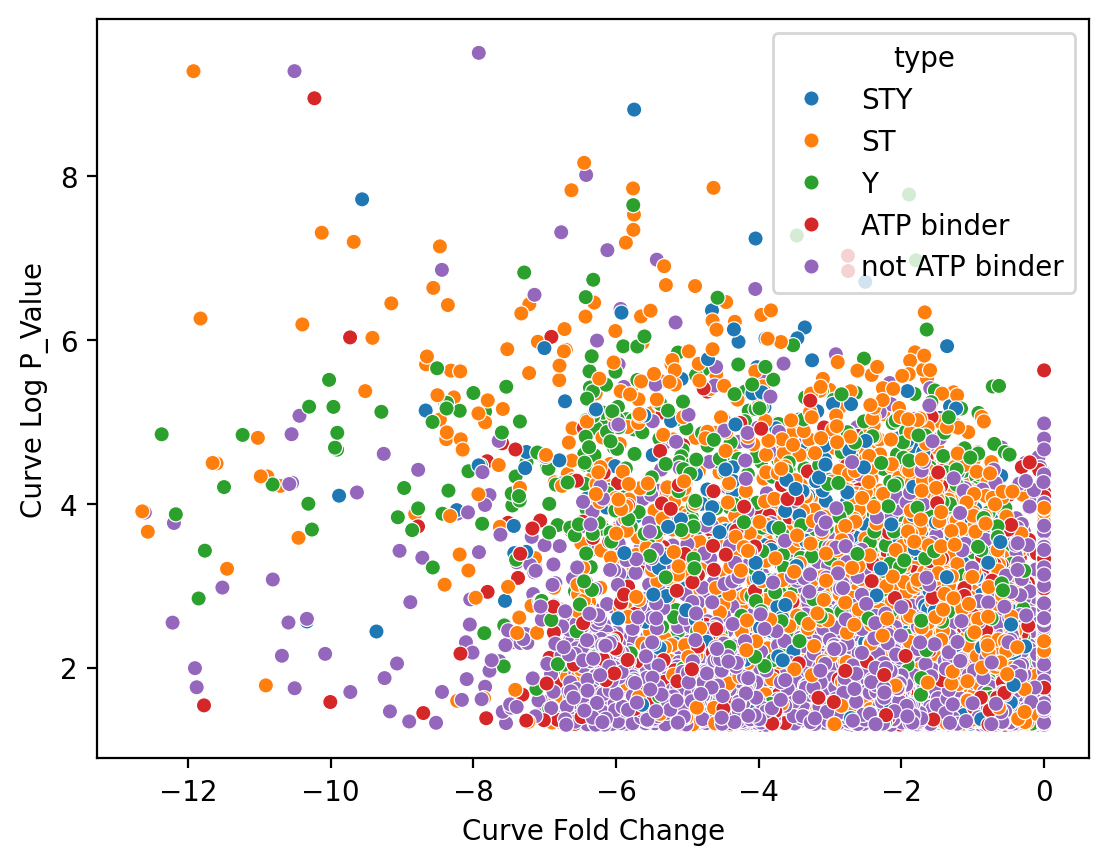

In [23]:
sns.scatterplot(data=Dfs, x='Curve Fold Change', y='Curve Log P_Value', hue='type', hue_order=hue_order, s=30)

In [24]:
Dfs['type'].value_counts()

type
not ATP binder    9126
ST                3080
ATP binder        1601
Y                 1336
STY                819
Name: count, dtype: int64

<Axes: xlabel='Curve Fold Change', ylabel='Curve Log P_Value'>

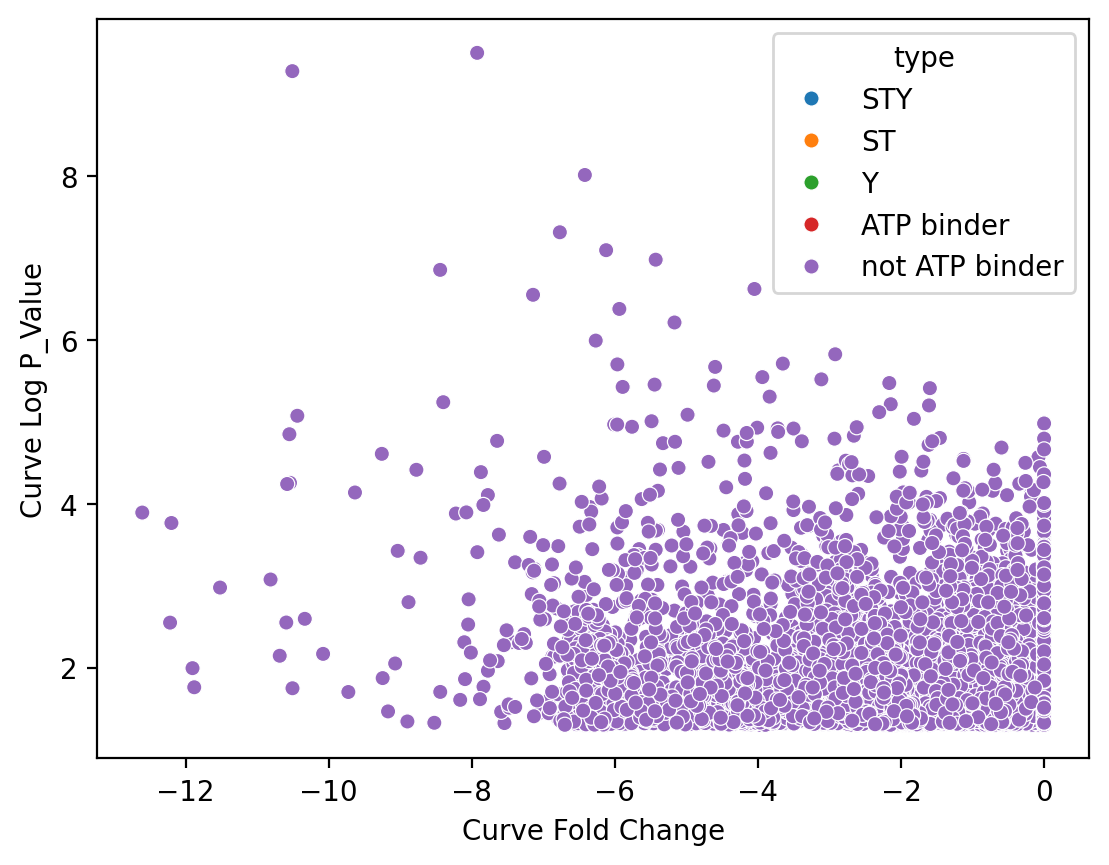

In [25]:
sns.scatterplot(data=Dfs[Dfs['type']=='not ATP binder'], x='Curve Fold Change', y='Curve Log P_Value', hue='type', hue_order=hue_order, s=30)

<Axes: xlabel='Curve Relevance Score', ylabel='Count'>

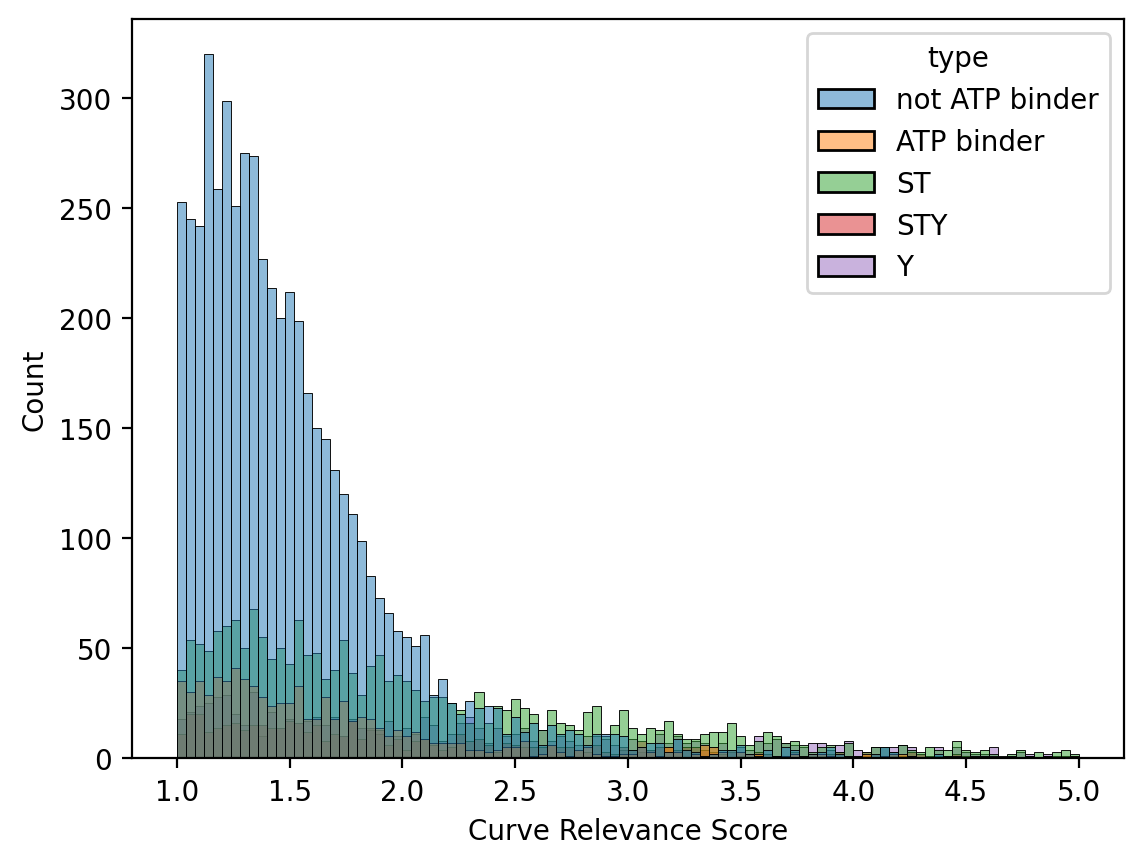

In [26]:
sns.histplot(data=Dfs, x='Curve Relevance Score', hue='type', bins=np.linspace(1,5,101))

In [27]:
Dfs[Dfs['type']=='not ATP binder']['Gene'].value_counts()

Gene
CUX1       78
FECH       52
INCENP     43
EIF3J      41
PIK3R1     36
           ..
HPS3        1
MAGEB2      1
PPIAL4C     1
CBFB        1
PNKD        1
Name: count, Length: 2184, dtype: int64

In [28]:
Dfs[Dfs['type'].isin(['ST', 'S', 'Y', 'STY'])]['Gene'].value_counts()

Gene
GAK       63
DDR1      54
FLT3      53
BMP2K     52
MAP3K1    51
          ..
LATS2      1
HIPK1      1
BRSK2      1
STK17A     1
MUSK       1
Name: count, Length: 281, dtype: int64

In [29]:
Dfs = Dfs[Dfs['type'].isin(['ST', 'S', 'Y', 'STY'])].copy()

In [30]:
# Add drug name infomration

In [31]:
df=pd.read_csv(f'/home/mgander/Atlantic/data/Viability/Drug_dict/4392375694988794540.txt', sep='\t', header=None)
df

,0,1
0,"((((2-(Hydroxy(oxido)amino)-4,5-dimethoxybenzy...",375630.0
1,((((4-Cyanophenyl)imino)(1-naphthylamino)methy...,378568.0
2,((((4-Cyanophenyl)imino)(2-naphthylamino)methy...,378574.0
3,(((1-(Benzylthio)cyclohexyl)thio)methyl)benzene,377593.0
4,(((1-(Benzylthio)cyclopentyl)thio)methyl)benzene,379229.0
...,...,...
32283,zygosporin a,98137101.0
32284,zygosporin a,6419417.0
32285,{3-[(4-Benzyloxycarbonylamino-butyl)-tert-buto...,389618.0
32286,{5-[2-Amino-6-(2-furyl)pyrimidin-4-yl]-2-furyl...,376142.0


In [32]:
import re
def remove_non_alphanumeric(input_string):
    return re.sub(r'[^a-zA-Z0-9]', '', input_string)
D_drug_to_id = dict(zip([remove_non_alphanumeric(str(a).lower()) for a in df[0]], df[1].astype('str')))

D_drug_to_id['alflutinib']='118861389'
D_drug_to_id['abivertinib']='72734520'
D_drug_to_id['abrocitinib']='483928136'
D_drug_to_id['almonertinib']='121280087'
D_drug_to_id['amcasertib']='25190990'
D_drug_to_id['anlotinib']='25017411'
D_drug_to_id['asciminib']='72165228'
D_drug_to_id['atuveciclib']='121488167'
D_drug_to_id['avapritinib']='118023034'
D_drug_to_id['azd7624']='-1'
D_drug_to_id['belizatinib']='57345941'
D_drug_to_id['belumosudil']='11950170'
D_drug_to_id['bgb324']='46215462'
D_drug_to_id['bgj398']='53235510'
D_drug_to_id['bimiralisib']='58507717'
D_drug_to_id['bms582949']='11848302'
D_drug_to_id['bms986142']='86582336'
D_drug_to_id['bms986165']='134821691'
D_drug_to_id['branebrutinib']='121293929'
D_drug_to_id['chiauranib']='49779393'
D_drug_to_id['darovasertib']='118873253'
D_drug_to_id['delgocitinib']='50914062'
D_drug_to_id['derazantinib']='46834118'
D_drug_to_id['duvelisib']='50905713'
D_drug_to_id['edicotinib']='25230468'
D_drug_to_id['fadraciclib']='24983461'
D_drug_to_id['famitinib']='16662431'
D_drug_to_id['futibatinib']='71621331'
D_drug_to_id['gsk2256098']='46214930'
D_drug_to_id['gsk3179106']='118115473'
D_drug_to_id['ilorasertib']='46207586'
D_drug_to_id['inavolisib']='124173720'
D_drug_to_id['lanraplenib']='118161062'
D_drug_to_id['lazertinib']='121269225'
D_drug_to_id['leniolisib']='57495353'
D_drug_to_id['lifirafenib']='71622942'
D_drug_to_id['mobocertinib']='118607832'
D_drug_to_id['nazartinib']='72703790'
D_drug_to_id['nemtabrutinib']='129045720'
D_drug_to_id['netarsudil']='66599893'
D_drug_to_id['olverembatinib']='51038269'
D_drug_to_id['ono4059']='54755438'
D_drug_to_id['onvansertib']='49792852'
D_drug_to_id['orelabrutinib']='91667513'
D_drug_to_id['parsaclisib']='86677874'
D_drug_to_id['pemigatinib']='86705695'
D_drug_to_id['pf06263276']='135567296'
D_drug_to_id['pf06273340']='66571548'
D_drug_to_id['pf06650833']='118414016'
D_drug_to_id['pirtobrutinib']='129269915'
D_drug_to_id['pralsetinib']='483927624'
D_drug_to_id['prexasertib']='46700756'
D_drug_to_id['pyrotinib']='51039030'
D_drug_to_id['radotinib']='16063245'
D_drug_to_id['ralimetinib']='11539025'
D_drug_to_id['remibrutinib']='118107483'
D_drug_to_id['repotrectinib']='135565923'
D_drug_to_id['rilzabrutinib']='73388818'
D_drug_to_id['ripretinib']='71584930'
D_drug_to_id['ritlecitinib']='118115473'
D_drug_to_id['roblitinib']='118036971'
D_drug_to_id['rogaratinib']='71611869'
D_drug_to_id['seletalisib']='56928390'
D_drug_to_id['selitrectinib']='129103609'
D_drug_to_id['selpercatinib']='134436906'
D_drug_to_id['solcitinib']='44603362'
D_drug_to_id['tak659']='53252276'
D_drug_to_id['tolebrutinib']='124111565'
D_drug_to_id['upadacitinib']='58557659'
D_drug_to_id['vactosertib']='54766013'
D_drug_to_id['vorolanib']='59215954'
D_drug_to_id['zandelisib']='66571003'

D_drug_to_id['tarloxtki']='24956525'
D_drug_to_id['trilaciclib']='68029831'
D_drug_to_id['tas0728']='-1'
D_drug_to_id['9ing41']='44582816'
D_drug_to_id['ceralasertib']='54761306'
D_drug_to_id['certican']='6442177'
D_drug_to_id['gsk2982772']='77108121'
D_drug_to_id['gsk3145095']='118557502'
D_drug_to_id['larotrectinib']='46188928'
D_drug_to_id['nemiralisib']='49784002'
D_drug_to_id['opaganib']='15604015'
D_drug_to_id['simotinib']='16735117'


for k in D_drug_to_id.keys():
    D_drug_to_id[k] = float(D_drug_to_id[k])

In [33]:
Dfs['Drug']=[remove_non_alphanumeric(a.split('_')[0].lower()) for a in Dfs.Name]

In [34]:
Dfs['Pubchem_CID']=Dfs['Drug'].map(D_drug_to_id)

In [35]:
Dfs['Gene']=[a.split('_')[-1] for a in Dfs.Name]

In [36]:
Dfs['Gene'].value_counts()

Gene
GAK            63
DDR1           54
FLT3           53
BMP2K          52
MAP3K1         51
               ..
PRPF4B          1
CDK8            1
HIPK1;HIPK2     1
BRSK2;BRSK1     1
SCYL1           1
Name: count, Length: 284, dtype: int64

<Axes: ylabel='Count'>

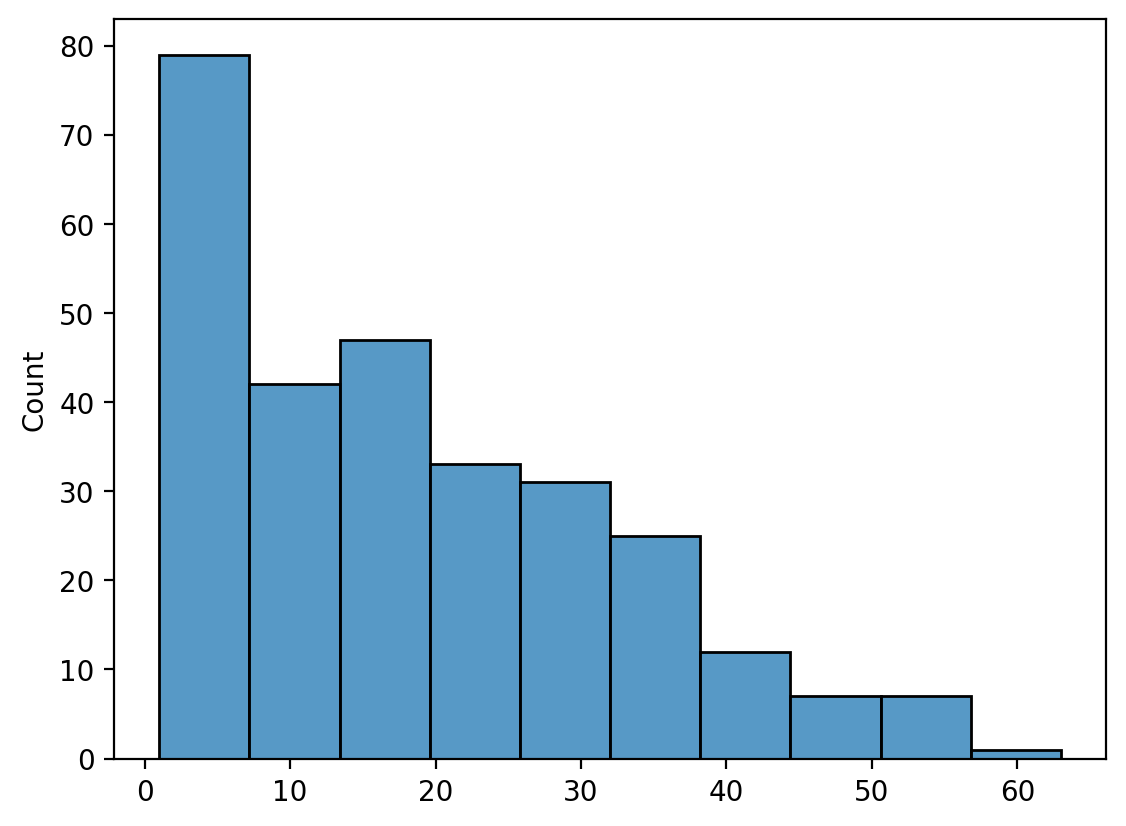

In [37]:
sns.histplot(Dfs.value_counts('Gene').values)

In [38]:
Dfs[np.isnan(Dfs['Pubchem_CID'])]

,Name,N duplicates,Raw 0,Raw 1,Raw 2,Raw 3,Raw 4,Raw 5,Raw 6,Raw 7,...,Curve Relevance Score,Curve Regulation,Gene,stys,sts,ys,atps,type,Drug,Pubchem_CID


In [39]:
Dfs['Pubchem_CID'] = Dfs['Pubchem_CID'].astype(int).astype('str')

In [40]:
Dfs.to_pickle('kinobead_annotated.pkl')

In [41]:
Dfs['Drug'].value_counts()

Drug
bgj398         168
peficitinib    123
brigatinib     121
naquotinib     116
abrocitinib    105
              ... 
gdc0623          3
torisel          2
certican         2
rapamycin        1
deforolimus      1
Name: count, Length: 165, dtype: int64

In [42]:
Dfs

,Name,N duplicates,Raw 0,Raw 1,Raw 2,Raw 3,Raw 4,Raw 5,Raw 6,Raw 7,...,Curve Relevance Score,Curve Regulation,Gene,stys,sts,ys,atps,type,Drug,Pubchem_CID
56,Alflutinib_O14976_GAK,1,1.0,0.886012,1.027367,0.968381,1.005930,0.908971,0.937770,0.891248,...,0.277891,not,GAK,0,1,0,1,ST,alflutinib,118861389
144,Alflutinib_O75582_RPS6KA5,1,1.0,0.930924,1.009399,0.883557,0.894203,0.982825,0.822881,0.804042,...,0.317131,not,RPS6KA5,0,1,1,1,STY,alflutinib,118861389
211,Alflutinib_P00533_EGFR,1,1.0,0.728897,0.738543,0.802604,0.585259,0.148096,0.005759,0.003941,...,2.860421,down,EGFR,0,0,1,1,Y,alflutinib,118861389
248,Alflutinib_P06241_FYN,1,1.0,0.937195,1.046513,0.976402,0.924791,0.772639,0.745993,0.724392,...,0.450539,NaN,FYN,0,0,1,1,Y,alflutinib,118861389
289,Alflutinib_P09619_PDGFRB,1,1.0,0.968843,0.994704,1.113978,1.245138,0.908382,0.851364,0.929448,...,1.046846,NaN,PDGFRB,0,0,1,1,Y,alflutinib,118861389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322442,CC-223_Q9BZL6_PRKD2,1,1.0,0.956021,0.998020,0.947021,1.007440,1.043199,0.954401,0.820784,...,0.217886,not,PRKD2,0,1,0,1,ST,cc223,58298316
322460,CC-223_Q9H2G2_SLK,1,1.0,1.053620,1.077153,1.037622,1.034732,1.099654,1.099345,0.726304,...,0.684280,NaN,SLK,0,1,0,1,ST,cc223,58298316
322540,CC-223_Q9NSY1;Q5H9B9_BMP2K,1,1.0,1.083354,0.992403,1.027102,1.010372,1.081683,0.929901,0.516124,...,1.655679,down,BMP2K,0,1,0,1,ST,cc223,58298316
322575,CC-223_Q9NYL2_ZAK,1,1.0,1.001704,0.996291,1.028321,1.013233,1.010627,0.981353,0.741454,...,1.006817,not,ZAK,0,1,0,1,ST,cc223,58298316


In [107]:
Dfs.sort_values('pEC50').iloc[10:20]

,Name,N duplicates,Raw 0,Raw 1,Raw 2,Raw 3,Raw 4,Raw 5,Raw 6,Raw 7,...,Curve Relevance Score,Curve Regulation,Gene,stys,sts,ys,atps,type,Drug,Pubchem_CID
24471,AZD3759_P06241_FYN,1,1.0,0.863287,0.856123,0.914623,0.884889,0.762065,0.775426,0.843179,...,0.090751,NaN,FYN,0,0,1,1,Y,azd3759,78209992
55665,BAY1895344_Q9UHD2_TBK1,1,1.0,0.979769,1.012771,0.969526,1.000948,0.949927,0.953278,0.938768,...,0.002052,not,TBK1,0,1,0,1,ST,bay1895344,118869362
297248,Tenalisib_P50613;Q9C098_CDK7,1,1.0,1.003375,0.957305,0.949562,0.951473,0.927439,0.912003,0.870214,...,0.045191,not,CDK7,0,1,0,1,ST,tenalisib,86291103
133036,Fruquintinib_Q9NWZ3_IRAK4,1,1.0,0.951402,0.969249,0.926124,0.940209,0.924072,0.937317,0.878770,...,0.059676,not,IRAK4,0,1,0,1,ST,fruquintinib,44480399
205842,OSI-027_P29323_EPHB2,2,2.0,1.859334,1.737646,1.649939,1.744582,1.783960,1.473549,1.550826,...,0.097764,NaN,EPHB2,0,0,1,1,Y,osi027,135398516
113207,Duvelisib_Q13188_STK3,1,1.0,0.934604,0.912661,0.950411,0.942941,0.882163,0.916287,0.909066,...,0.058175,not,STK3,0,1,0,1,ST,duvelisib,50905713
208959,Olmutinib_Q96GD4;Q9UQB9_AURKB,1,1.0,0.961301,0.897734,0.906226,0.933257,0.833401,0.865680,0.857458,...,0.116288,not,AURKB,1,1,0,1,STY,olmutinib,54758501
36850,Acalabrutinib_Q16539_MAPK14,1,1.0,0.896721,0.941577,0.876345,0.906834,0.900175,0.837347,0.835044,...,0.145436,not,MAPK14,0,1,0,1,ST,acalabrutinib,71226662
208474,Olmutinib_Q14004_CDK13,1,1.0,0.893155,0.837436,0.831068,0.822128,0.894195,0.891318,0.796228,...,0.114857,NaN,CDK13,0,1,0,1,ST,olmutinib,54758501
272591,Selpercatinib_P00519_ABL1,1,1.0,0.950325,0.910167,0.886720,0.946859,0.861441,0.888224,0.902417,...,0.089352,not,ABL1,0,0,1,1,Y,selpercatinib,134436906


In [108]:
Dfss = Dfs[(Dfs['Drug']=='duvelisib')&(Dfs[['stys', 'sts', 'ys']].sum(1)>0)].copy().sort_values('pEC50').copy()
Dfss  = Dfss[Dfss['Curve Regulation']=='down'].copy()

In [109]:
Z = Dfss[[f'Raw {i}' for i in range(9)]].copy()

(0.0, 1.3)

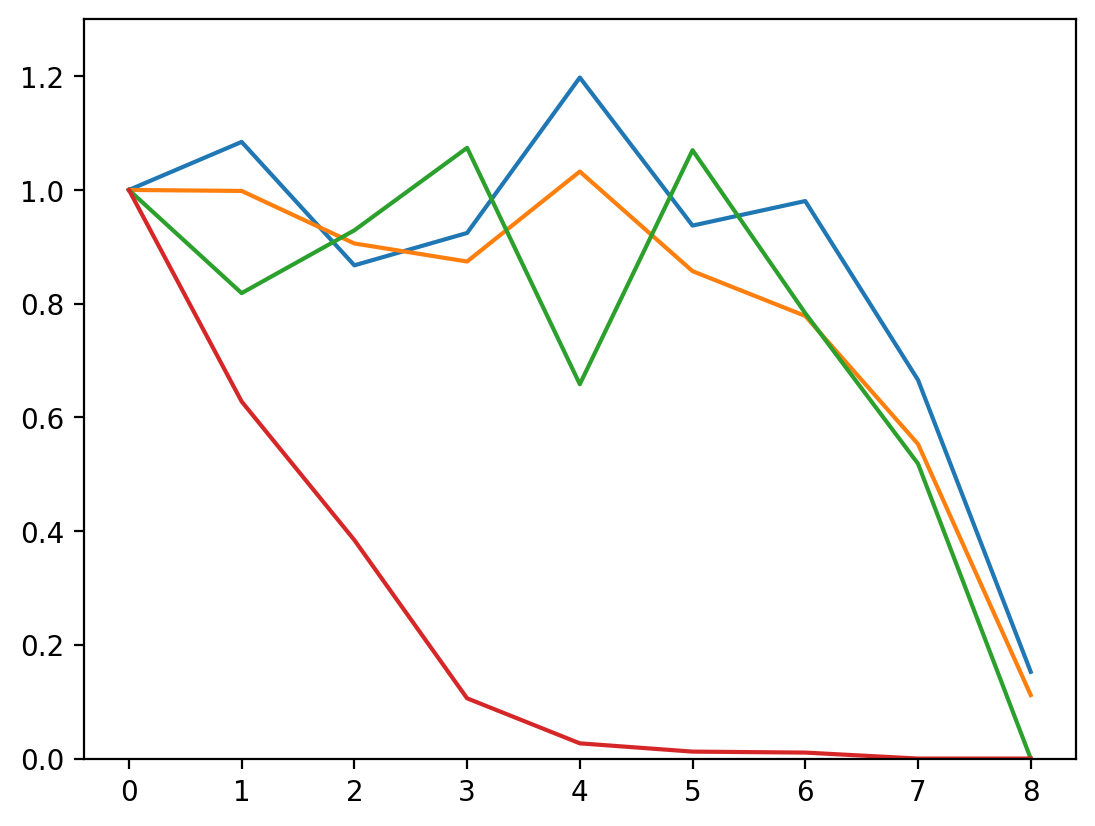

In [112]:
sns.lineplot(x=range(9), y=Z.iloc[:1,:].values.flatten())
sns.lineplot(x=range(9), y=Z.iloc[1:2,:].values.flatten())
sns.lineplot(x=range(9), y=Z.iloc[2:3,:].values.flatten())
sns.lineplot(x=range(9), y=Z.iloc[3:4,:].values.flatten())
plt.ylim(0,1.3)

In [115]:
Dfss['pEC50']

112824    5.187215
113718    5.393442
112679    5.414917
112869    8.278102
Name: pEC50, dtype: float64

In [67]:
sns.lineplot(data=Dfss[[f'Raw {i} for i in range(10)']]

SyntaxError: unexpected EOF while parsing (2811338199.py, line 1)

In [45]:
sorted(set(Dfs.Drug))

['9ing41',
 'abivertinib',
 'abrocitinib',
 'acalabrutinib',
 'alflutinib',
 'almonertinib',
 'amcasertib',
 'amg337',
 'anlotinib',
 'apitolisib',
 'asciminib',
 'atuveciclib',
 'avapritinib',
 'azd0156',
 'azd2014',
 'azd3759',
 'azd6482',
 'azd7624',
 'azd8055',
 'azd8186',
 'azd8835',
 'bay1125976',
 'bay1251152',
 'bay1895344',
 'belizatinib',
 'belumosudil',
 'belvarafenib',
 'bgb324',
 'bgj398',
 'bgt226',
 'bimiralisib',
 'bms582949',
 'bms986142',
 'bms986165',
 'branebrutinib',
 'brigatinib',
 'buparlisib',
 'byl719',
 'cc115',
 'cc223',
 'cep37440',
 'ceralasertib',
 'certican',
 'cfi400945',
 'cfi402257',
 'ch5132799',
 'chiauranib',
 'copanlisib',
 'dactolisib',
 'darovasertib',
 'deforolimus',
 'delgocitinib',
 'derazantinib',
 'duvelisib',
 'edicotinib',
 'ensartinib',
 'entospletinib',
 'erdafitinib',
 'evobrutinib',
 'fadraciclib',
 'famitinib',
 'fenebrutinib',
 'flumatinib',
 'fruquintinib',
 'futibatinib',
 'gandotinib',
 'gdc0032',
 'gdc0623',
 'gedatolisib',
 'gsk